In [1]:
# Import all necesssary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

In [2]:
# Load dataset
df = pd.read_csv("TelcoCustomerChurn.csv")

In [3]:
# Preprocessing
df.drop(columns=['customerID'], inplace=True)  # Drop ID column
df.replace({'No internet service': 'No', 'No phone service': 'No'}, inplace=True)  # Normalize categorical values


In [4]:
# Convert categorical columns to numeric
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])


In [5]:
# Split dataset
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [8]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [9]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7800
Precision: 0.6119
Recall: 0.4679
F1-Score: 0.5303
ROC-AUC Score: 0.8235


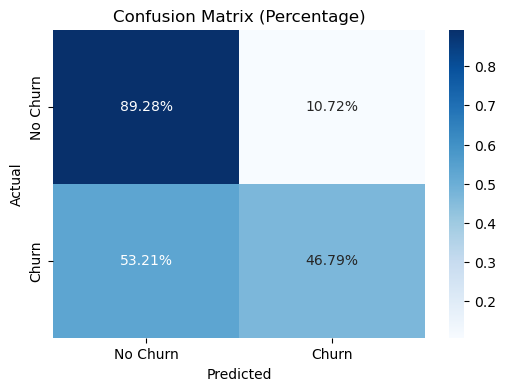

In [10]:
# 1. Confusion Matrix with Percentages
cm = confusion_matrix(y_test, y_pred)
cm_perc = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

plt.figure(figsize=(6, 4))
sns.heatmap(cm_perc, annot=True, fmt=".2%", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Percentage)')
plt.show()

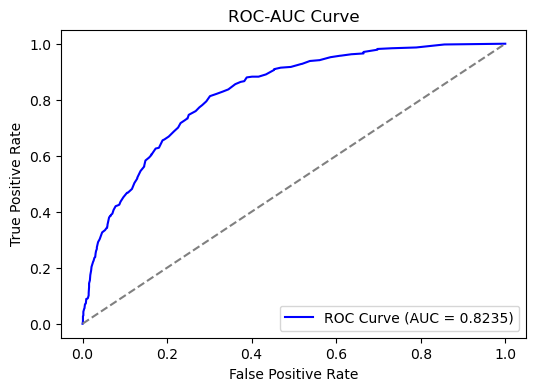

In [11]:
# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

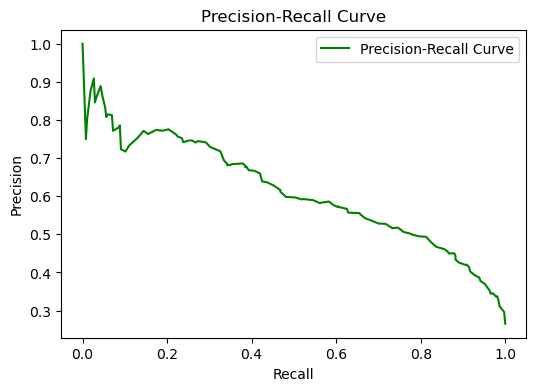

In [12]:
# 3. Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(recall_vals, precision_vals, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_7880\2371440391.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


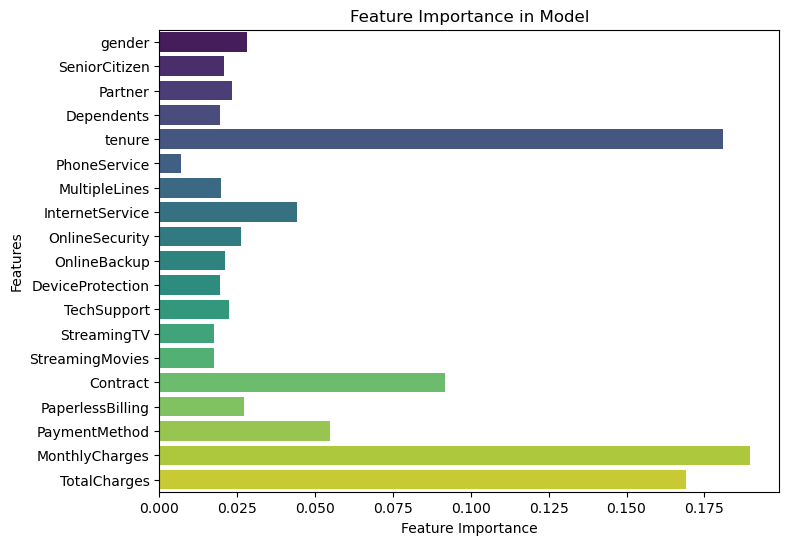

In [13]:
# 4. Feature Importance
feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Model")
plt.show()

C:\Users\sandh\AppData\Local\Temp\ipykernel_7880\449689715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


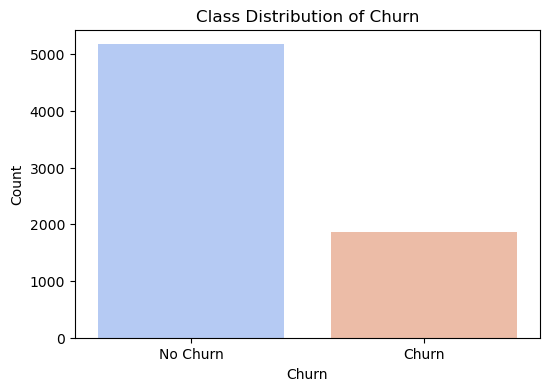

In [14]:
# 5. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, palette="coolwarm")
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])
plt.ylabel("Count")
plt.title("Class Distribution of Churn")
plt.show()

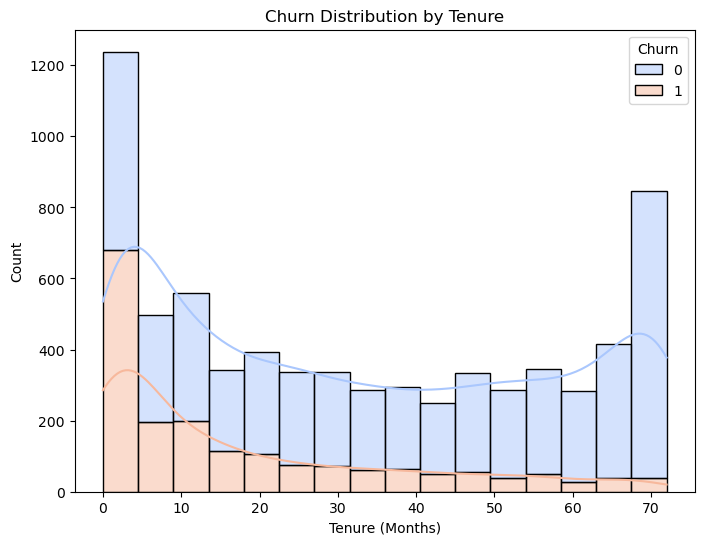

In [15]:
# 6. Churn Distribution by Tenure
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, multiple="stack", palette="coolwarm")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.title("Churn Distribution by Tenure")
plt.show()

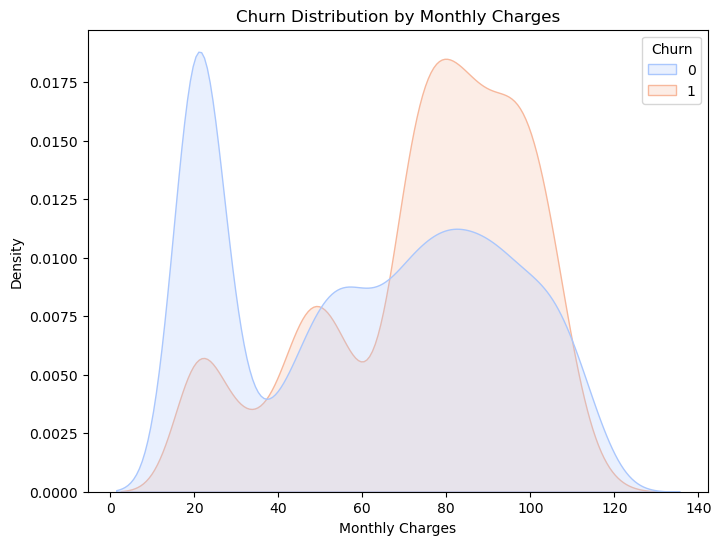

In [16]:
# 7. Churn by Monthly Charges
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True, common_norm=False, palette="coolwarm")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Churn Distribution by Monthly Charges")
plt.show()